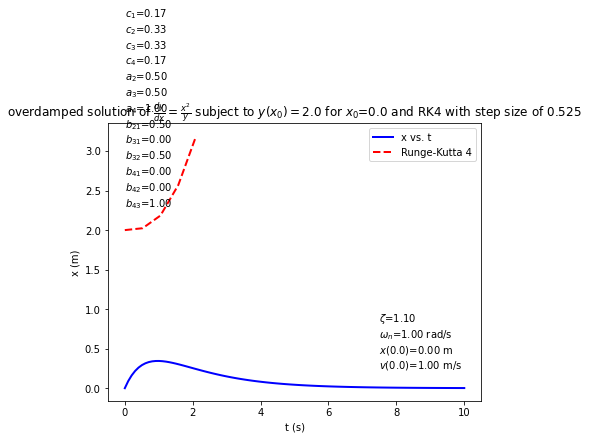

In [28]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

fxy = lambda x,y: pow(x,2)/y
fxy_lhs = "dy/dx"
fxy_rhs = "x^2/y"
#fn_string = "ln(x) - 0.6931"
fxy_lhs_syms = sympy.latex(sympy.sympify(fxy_lhs))
fxy_rhs_syms = sympy.latex(sympy.sympify(fxy_rhs))


c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

def rk4(xi, yi,h):
    K1 = fxy(xi,yi)
    K2 = fxy(xi+a2*h,yi+b21*K1*h)
    K3 = fxy(xi+a3*h,yi+b31*K1*h+b32*K2*h)
    K4 = fxy(xi+a4*h,yi+b41*K1*h+b42*K2*h+b43*K3*h)   
    yip1 = yi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1


a = 0.0    #initial value for x
b = 2.1    #final value for x
x_TS = np.linspace(a,b)
y_TS = [sqrt(2*pow(num,3)/3+4) for num in x_TS] 

n = 5     #number of x values
h = (b-a)/(n-1)   #step size
x_rk4 = np.zeros(n)
y_rk4 = np.zeros(n)
iv = 2.0
y_rk4[0] = iv      #initial condition
x_rk4[0] = a

for i in range(1,n):
    x_rk4[i] = a + i*h
    y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],h)
    
def x_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
def v_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)

zeta = 1.1
omega_n = 1.
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]


iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"
iv_lhs_syms=sympy.latex(sympy.sympify(iv_lhs))
iv_rhs_syms=sympy.latex(sympy.sympify(iv_rhs))
    
fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.plot(x_rk4,y_rk4,label="Runge-Kutta 4",color="r",linestyle="--",linewidth="2.0")
plt.title(f"overdamped solution of ${fxy_lhs_syms}={fxy_rhs_syms}$ subject to ${iv_lhs_syms}={iv_rhs_syms}$ for $x_0$={a} and RK4 with step size of {h:.3f}")
plt.text(0,2.3, f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.legend()
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

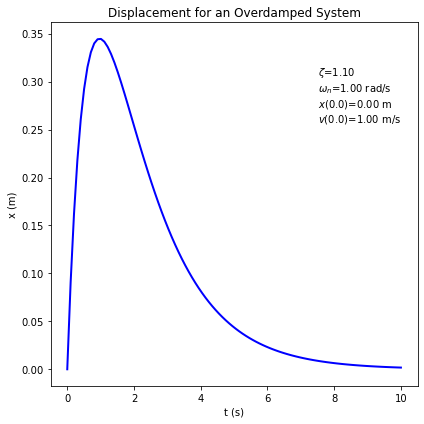

In [13]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(lI,lII,t):
    return 1/(lI-lII)*exp(lI*t)+1/(lII-lI)*exp(lII*t)
def v_of_t(lI,lII,t):
    return lI/(lI-lII)*exp(lI*t)+lII/(lII-lI)*exp(lII*t)

zeta = 1.1
omega_n = 1.
lambda_I = -omega_n * (zeta - sqrt(zeta**2 - 1))
lambda_II = -omega_n * (zeta + sqrt(zeta**2 - 1))

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(lambda_I, lambda_II,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Overdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(lambda_I,lambda_II,t[0])
v0 = v_of_t(lambda_I,lambda_II,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

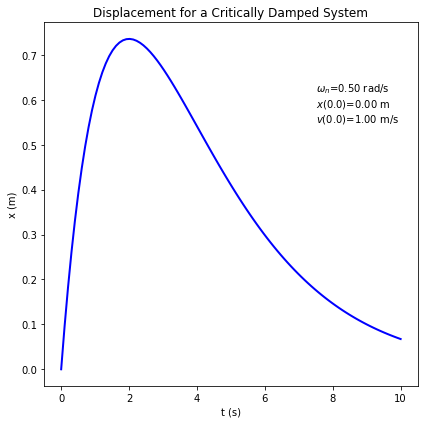

In [7]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(omega_n, t):
    return t*exp(-omega_n*t)
def v_of_t(omega_n, t):
    return exp(-omega_n*t)*(1-omega_n*t)

omega_n = 0.5

ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
x = [x_of_t(omega_n,tval) for tval in t]

fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for a Critically Damped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
x0 = x_of_t(omega_n,t[0])
v0 = v_of_t(omega_n,t[0])
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

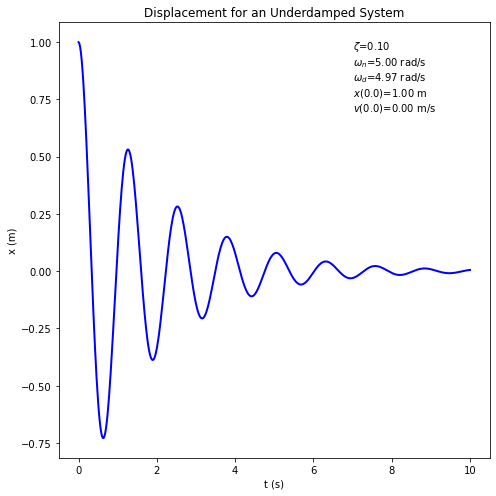

In [10]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

def x_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(cos(omega_d*t)+zeta*omega_n/omega_d*sin(omega_d*t))
def v_of_t(zeta,omega_n,omega_d,t):
    return exp(-zeta*omega_n*t)*(-omega_d*sin(omega_d*t)-zeta*omega_n*cos(omega_d*t)+zeta*omega_n/omega_d*(omega_d*cos(omega_d*t)-zeta*omega_n*sin(omega_d*t)))       

zeta = 0.1
omega_n = 5
omega_d = omega_n*sqrt(1-zeta**2)

ti = 0.
tf = 10.
t = np.linspace(ti,tf,500)
x = [x_of_t(zeta,omega_n,omega_d,tval) for tval in t]

fig = plt.figure(figsize=(7,7))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Displacement for an Underdamped System")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
omega_d_str = "\omega_d"
x0 = x_of_t(zeta,omega_n,omega_d,t[0])
v0 = v_of_t(zeta,omega_n,omega_d,t[0])
txt_loc_x = 0.70*tf
txt_loc_y = 0.70*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n${omega_d_str}$={omega_d:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()